# **Hands-on 4: Logistic Regression Notebook**

**Clasificación Inteligente de Datos**

Daniel García Figueroa

## **1.1  Fundamentos de la técnica**

La regresión logística es un algoritmo de aprendizaje automático supervisado que se utiliza para problemas de clasificación. A diferencia de la regresión lineal, que predice valores continuos, predice la probabilidad de que una entrada pertenezca a una clase específica.
- Se utiliza para clasificación binaria donde la salida puede ser una de dos categorías posibles como Sí/No, Verdadero/Falso o 0/1.
- Utiliza la función sigmoidea para convertir las entradas en un valor de probabilidad entre 0 y 1.

**Tipos de regresión logística:**

- Binomial: Para variables con dos categorías (Sí/No, 0/1). Es la más común.
- Multinomial: Para variables con tres o más categorías sin orden (ej. gato, perro, oveja).
- Ordinal: Para variables con tres o más categorías ordenadas (bajo, medio, alto), considerando ese orden en el modelo.

**Cómo funciona**

1. El modelo crea una combinación lineal de las variables:

   $$ z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_k x_k $$

2. Ese valor se pasa por la función sigmoide para convertirlo en una probabilidad:

   $$ p = \frac{1}{1 + e^{-z}} $$

3. La probabilidad se compara con un umbral (típicamente 0.5) para asignar la clase.

4. Los parámetros $\beta$ se ajustan mediante máxima verosimilitud.

## **1.2  Modelo Matemático**

La regresión logística modela la probabilidad de que ocurra un evento (clase 1).  
Primero se construye una combinación lineal de las variables:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_k x_k
$$

Luego se aplica la función sigmoide para obtener una probabilidad entre 0 y 1:

$$
p = \frac{1}{1 + e^{-z}}
$$

También puede expresarse en su forma de **logit**, que es el logaritmo del odds:

$$
\ln\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k
$$

Los parámetros $\beta$ se estiman mediante **máxima verosimilitud**, buscando que el modelo produzca probabilidades que se ajusten a los datos observados.


## **1.3 Descripción de la librería, clases, funciones en su respectiva sección**

## **1.4 Pipeline**

El propósito de aplicar el algoritmo de **regresión logística** en este dataset es predecir si un tumor es **benigno** o **maligno** utilizando las características obtenidas de imágenes digitalizadas de tejido mamario.

La idea es modelar la probabilidad de que un tumor pertenezca a una de las dos clases, basándose en variables como la textura, el radio, la compacidad, la simetría y otras medidas derivadas de la forma de las células.

Con este modelo se busca identificar de manera temprana patrones que permitan distinguir tumores benignos de malignos, facilitando un apoyo computacional al diagnóstico médico.

### **1.4.1 Preprocesamiento**

Resumen estadístico:
       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count            569.00          569.00               569.00         569.00   
mean               0.10            0.09                 0.05           0.18   
std                0.

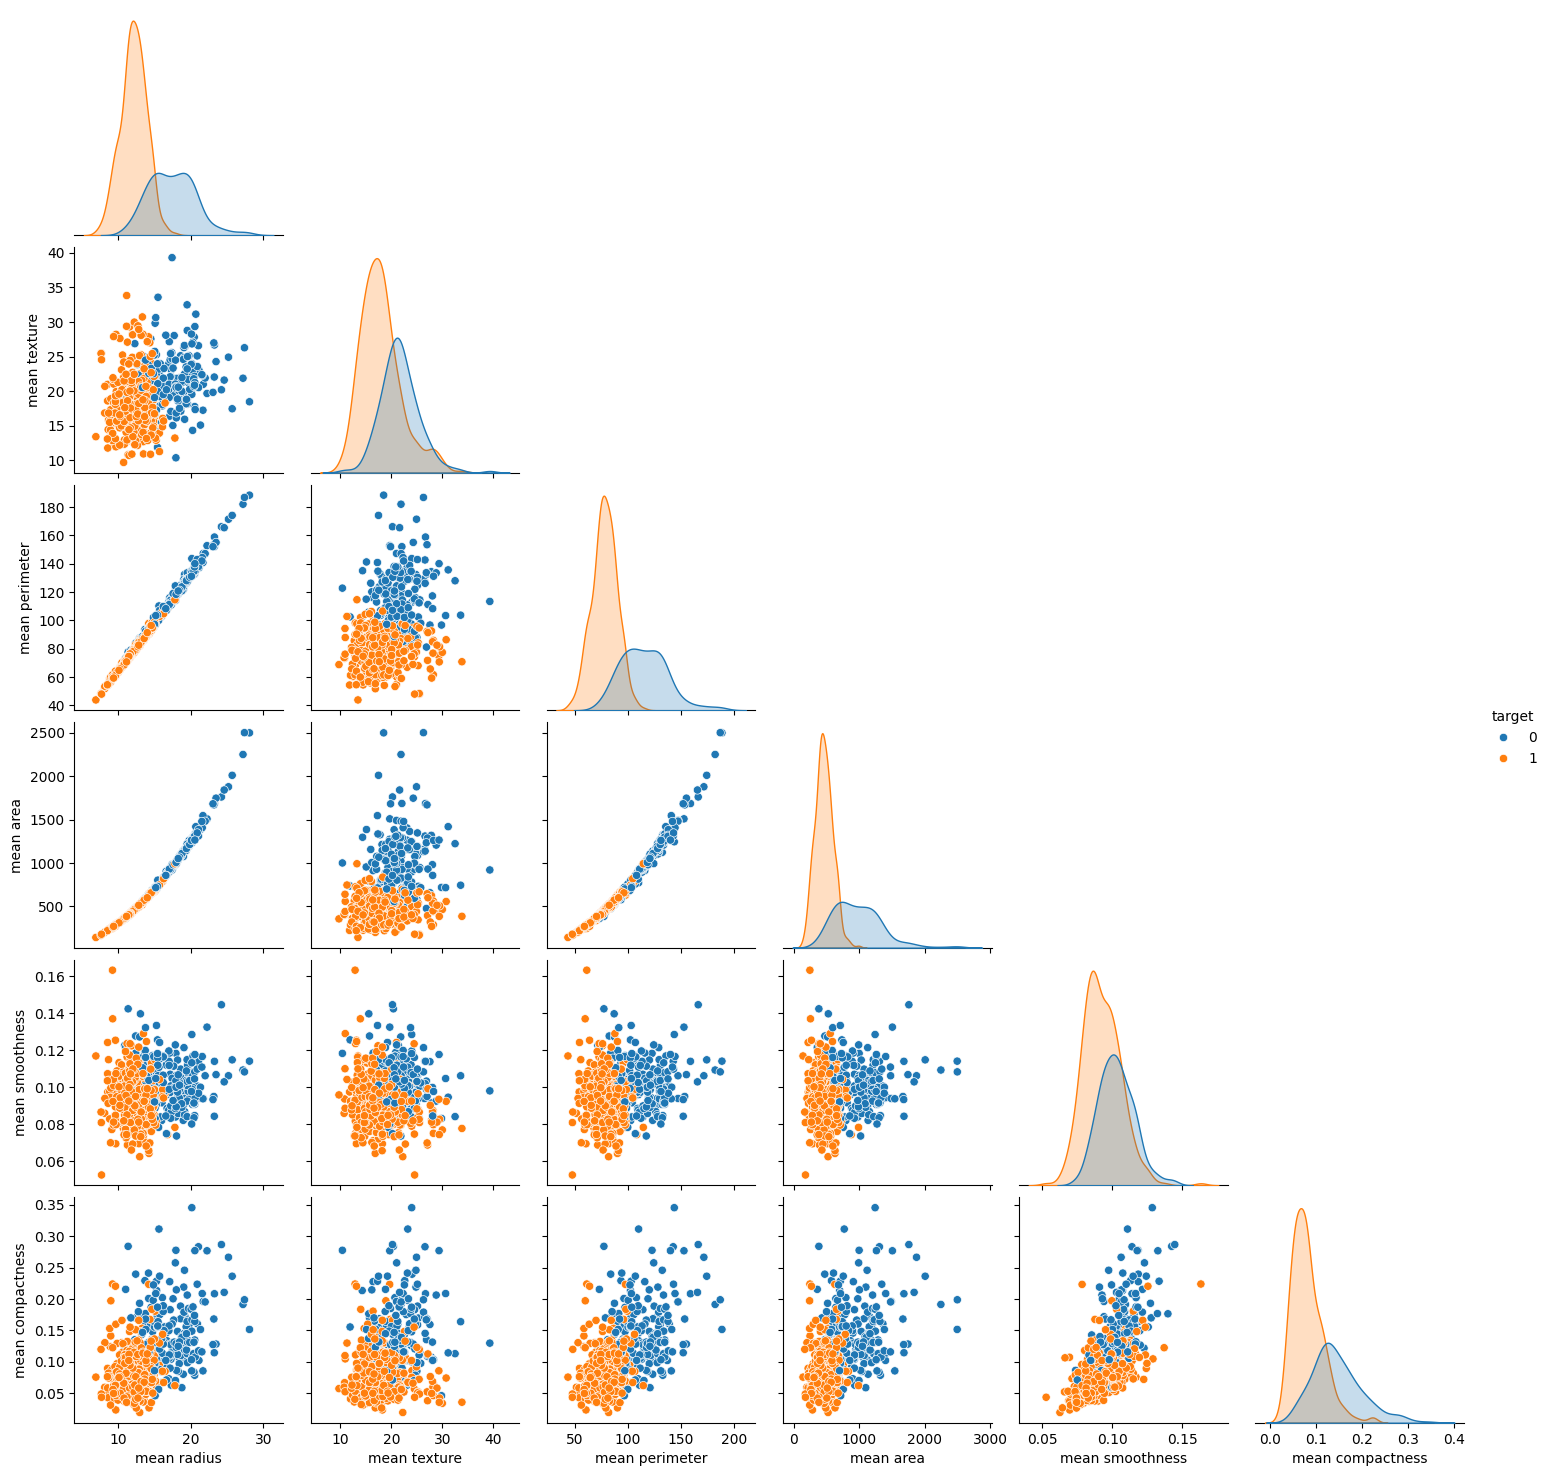

In [5]:
from sklearn.datasets import load_breast_cancer # Para cargar el dataset de cancer incluido en la libreria
import pandas as pd # Está diseñada específicamente para la manipulación y el análisis de datos en el lenguaje Python. Trabaja sobre dataframes
import matplotlib.pyplot as plt # Librería para crear gráficos
import seaborn as sns # Librería para gráficos estadísticos

cancer = load_breast_cancer() # Cargamos el dataset de cancer
df = pd.DataFrame(cancer.data, columns=cancer.feature_names) # Creamos un dataframe con los datos del dataset
df['target'] = cancer.target # Creamos una columna con la variable objetivo

# Muestra estadísticas descriptivas del dataset
print("Resumen estadístico:")
print(df.describe().round(2))
print()
# Muestra el tamaño del dataset (filas, columnas)
print("Tamaño del dataset (filas,columnas):")
print(df.shape)
print()
# Muestra las primeras 5 filas
print("Primeras 5 filas:")
print(df.head())
print()

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'target'] # Seleccione algunas características para no saturar la graficación

# Graficas de dispersión
sns.pairplot(df[features], hue='target', corner=True) # Crea un gráfico de dispersión para algunas de las combinaciones de variables en el dataset
plt.show()




En el dataset de cáncer de mama proporcionado por la librería sklearn.datasets, se incluyen 30 características extraídas de imágenes digitalizadas de masas mamarias. La variable objetivo indica si el tumor es maligno (0) o benigno (1).

Las características del dataset son:

- Radio promedio (mean radius)
- Textura promedio (mean texture)
- Perímetro promedio (mean perimeter)
- Área promedio (mean area)
- Suavidad promedio (mean smoothness)
- Compacidad promedio (mean compactness)
- Concavidad promedio (mean concavity)
- Puntos cóncavos promedio (mean concave points)
- Simetría promedio (mean symmetry)
- Dimensión fractal promedio (mean fractal dimension)
- Error de radio (radius error)
- Error de textura (texture error)
- Error de perímetro (perimeter error)
- Error de área (area error)
- Error de suavidad (smoothness error)
- Error de compacidad (compactness error)
- Error de concavidad (concavity error)
- Error de puntos cóncavos (concave points error)
- Error de simetría (symmetry error)
- Error de dimensión fractal (fractal dimension error)
- Radio “peor” (worst radius)
- Textura “peor” (worst texture)
- Perímetro “peor” (worst perimeter)
- Área “peor” (worst area)
- Suavidad “peor” (worst smoothness)
- Compacidad “peor” (worst compactness)
- Concavidad “peor” (worst concavity)
- Puntos cóncavos “peor” (worst concave points)
- Simetría “peor” (worst symmetry)
- Dimensión fractal “peor” (worst fractal dimension)

In [8]:
import numpy as np  # Para operaciones numéricas y conteos
from sklearn.model_selection import train_test_split  # Para dividir datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Para normalizar los datos

# Seleccionamos todas las características excepto la variable objetivo
X = df.drop('target', axis=1).values

# Guardamos la variable objetivo (0 = maligno, 1 = benigno)
y = df['target'].values

# Dividimos los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Normalización de las características
scaler = StandardScaler()                  # Creamos un objeto StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # Se ajusta y transforma el entrenamiento
X_test_scaled = scaler.transform(X_test)        # Se transforma el conjunto de prueba

# Información del tamaño de los conjuntos
print(f"Datos de entrenamiento: {X_train.shape}")   # Filas y columnas
print(f"Datos de prueba: {X_test.shape}")
print()

# Distribución de clases en el conjunto de entrenamiento
print("Distribución de clases en el conjunto de entrenamiento:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

Datos de entrenamiento: (398, 30)
Datos de prueba: (171, 30)

Distribución de clases en el conjunto de entrenamiento:
1    62.562814
0    37.437186
Name: proportion, dtype: float64


### **1.4.2 Predicción**

In [9]:
# Regresión Logistica: clase que implementa el algoritmo
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # Creamos un objeto de la clase LogisticRegression
lr.fit(X_train_scaled, y_train) # Entrenamos el modelo con los datos de entrenamiento

def probar_patron(lr_modelo, X):
  y_pred = lr_modelo.predict(X) # Realizamos predicciones en el conjunto de prueba
  return y_pred

In [10]:
for i in range(len(X_test_scaled)):
    entrada = X_test_scaled[i].reshape(1, -1)   # Tomamos una sola instancia
    prediccion = probar_patron(lr, entrada)     # La predecimos
    print(f"Entrada {i}: Clase predicha = {prediccion[0]}")

Entrada 0: Clase predicha = 1
Entrada 1: Clase predicha = 0
Entrada 2: Clase predicha = 0
Entrada 3: Clase predicha = 1
Entrada 4: Clase predicha = 1
Entrada 5: Clase predicha = 0
Entrada 6: Clase predicha = 0
Entrada 7: Clase predicha = 0
Entrada 8: Clase predicha = 1
Entrada 9: Clase predicha = 1
Entrada 10: Clase predicha = 1
Entrada 11: Clase predicha = 0
Entrada 12: Clase predicha = 1
Entrada 13: Clase predicha = 0
Entrada 14: Clase predicha = 1
Entrada 15: Clase predicha = 0
Entrada 16: Clase predicha = 1
Entrada 17: Clase predicha = 1
Entrada 18: Clase predicha = 1
Entrada 19: Clase predicha = 0
Entrada 20: Clase predicha = 1
Entrada 21: Clase predicha = 1
Entrada 22: Clase predicha = 0
Entrada 23: Clase predicha = 1
Entrada 24: Clase predicha = 1
Entrada 25: Clase predicha = 1
Entrada 26: Clase predicha = 1
Entrada 27: Clase predicha = 1
Entrada 28: Clase predicha = 1
Entrada 29: Clase predicha = 0
Entrada 30: Clase predicha = 1
Entrada 31: Clase predicha = 1
Entrada 32: Clase 

### **1.4.3 Evaluación de Modelo**

Accuracy: 0.9824561403508771



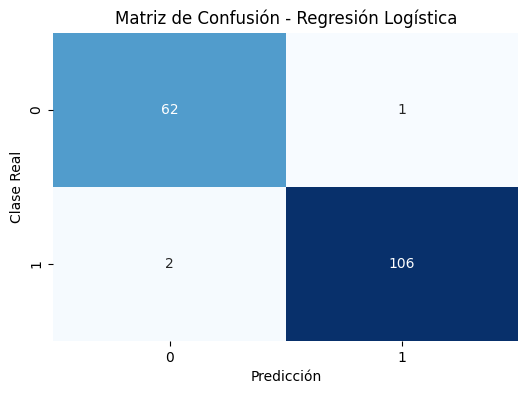

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix  # Para precisión y matriz de confusión

# Predicciones sobre el conjunto de prueba
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)) # Accuracy del modelo
print()
matriz = confusion_matrix(y_test, y_pred) # Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(matriz,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.show()


### **Conclusión**

El modelo que implementé logró una precisión del 98% en el conjunto de prueba, por lo que casi todas las predicciones de la Regresión Logística fueron correctas. Esto muestra que el modelo es muy efectivo para distinguir entre tumores benignos y malignos en este dataset.

Al revisar el rendimiento general, se observa que el modelo clasifica de manera consistente y equilibrada, sin mostrar problemas importantes con alguna de las dos clases. Esto es especialmente importante en un contexto médico, donde la correcta identificación de casos malignos es fundamental.

Comparando con otros algoritmos más simples, la Regresión Logística demuestra ser una muy buena opción para este tipo de datos, ya que logra capturar las relaciones entre las características de los tumores y su diagnóstico de forma precisa y estable.

## **1.5 Referencias bibliográficas**

GeeksforGeeks. (2025, November 18). Logistic regression in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/

Rodrigo, J. A. (n.d.). Regresión logística con Python. https://cienciadedatos.net/documentos/py17-regresion-logistica-python

¿Qué es la regresión logística? - Explicación del modelo de regresión logística - AWS. (n.d.). Amazon Web Services, Inc. https://aws.amazon.com/es/what-is/logistic-regression/

